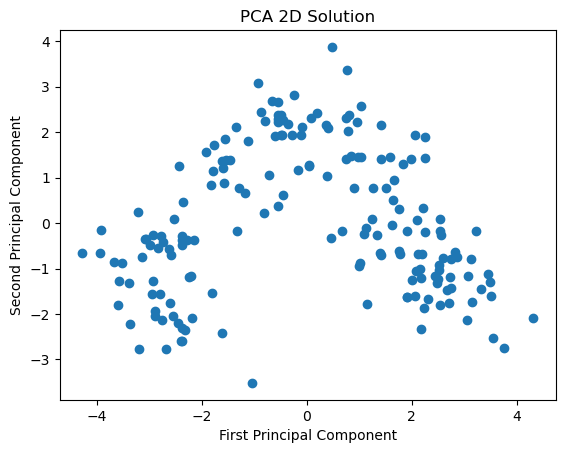

Number of eigenvalues above 1: 3
Explained variance by the first two dimensions: 55.41%


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('wines.csv')
X = data.values

# Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Find eigenvalues above 1
eigenvalues = pca.explained_variance_
eigenvalues_above_1 = eigenvalues[eigenvalues > 1]
num_eigenvalues_above_1 = len(eigenvalues_above_1)

# Compute the explained variance by the first two dimensions
explained_variance = pca.explained_variance_ratio_
explained_variance_2D = explained_variance[:2].sum()

# Plot the 2D solution
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA 2D Solution')
plt.show()

print(f'Number of eigenvalues above 1: {num_eigenvalues_above_1}')
print(f'Explained variance by the first two dimensions: {explained_variance_2D * 100:.2f}%')


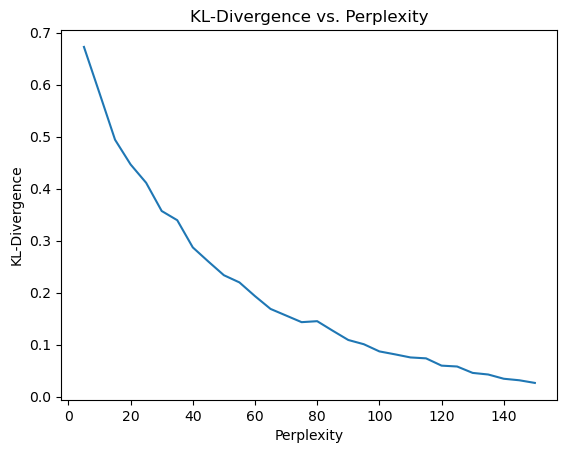

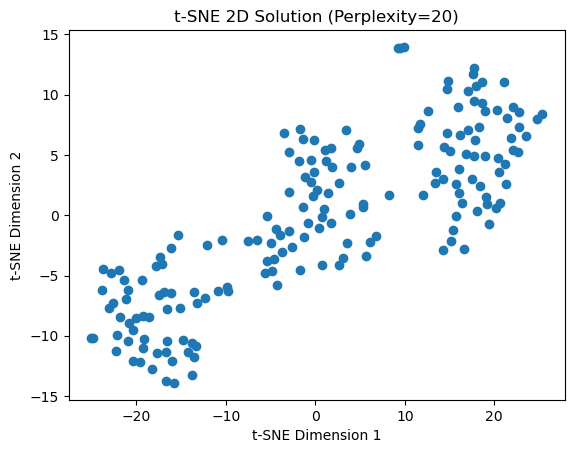

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Parameters
perplexities = np.arange(5, 151, 5)
kl_divergences = []

# Apply t-SNE and compute KL-divergence for different perplexities
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_std)
    kl_divergences.append(tsne.kl_divergence_)

# Plot KL-divergence vs. perplexity
plt.plot(perplexities, kl_divergences)
plt.xlabel('Perplexity')
plt.ylabel('KL-Divergence')
plt.title('KL-Divergence vs. Perplexity')
plt.show()

# Apply t-SNE with perplexity 20 and plot the 2D solution
tsne_20 = TSNE(n_components=2, perplexity=20, random_state=42)
X_tsne_20 = tsne_20.fit_transform(X_std)
plt.scatter(X_tsne_20[:, 0], X_tsne_20[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE 2D Solution (Perplexity=20)')
plt.show()


/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS Stress: 21609.09


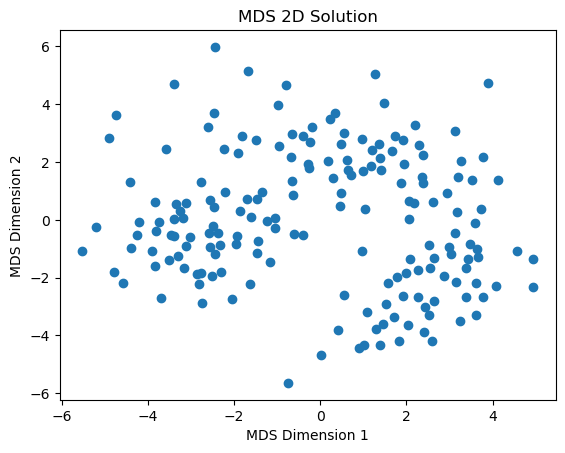

In [8]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

# Apply MDS and create a 2-dimensional embedding
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_std)

# Calculate the resulting stress
stress = mds.stress_

# Print the stress value
print(f'MDS Stress: {stress:.2f}')

# Plot the MDS 2D solution
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS 2D Solution')
plt.show()




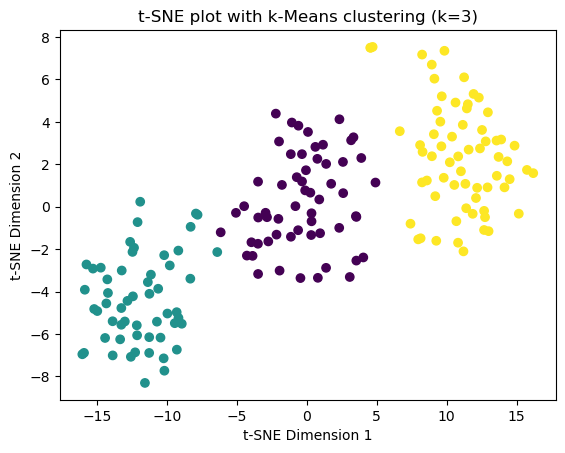

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'standardized_data' contains the standardized wine dataset
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X_std)

# Determine the optimal number of clusters using the Silhouette method
silhouette_scores = []
max_clusters = 10
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto')
    cluster_labels = kmeans.fit_predict(tsne_data)
    silhouette_avg = silhouette_score(tsne_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_k = np.argmax(silhouette_scores) + 2

# Perform k-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init = 'auto')
cluster_labels = kmeans.fit_predict(tsne_data)

# Calculate the total sum of the distance of all points to their respective cluster centers
total_sum_of_distances = kmeans.inertia_

# Plot the t-SNE 2D solution with k-Means clustering
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f't-SNE plot with k-Means clustering (k={optimal_k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [14]:
print(total_sum_of_distances )

2042.94140625


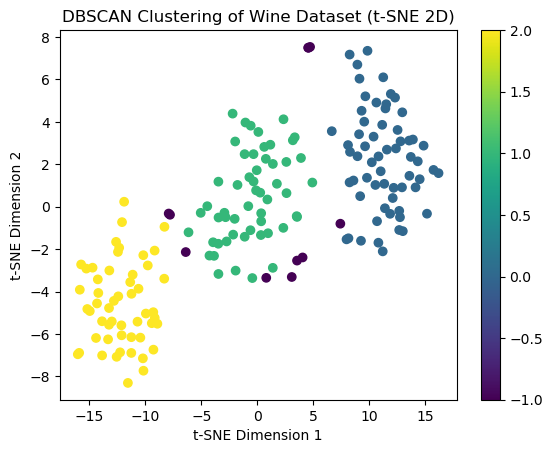

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



# Apply t-SNE to obtain a 2D representation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Apply DBSCAN clustering
epsilon = 1.8  # Set the radius of the perimeter (epsilon)
min_points = 5  # Set the minimal number of points within the perimeter (minPoints)
dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
clusters = dbscan.fit_predict(X_tsne)

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering of Wine Dataset (t-SNE 2D)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()
